In [ ]:
# 
<hr/>

In [9]:
# libaries 

import pandas as pd

## GEO LOCATION
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [95]:
# Input of Bed n Breakfast location
#     reading in all list and choosing one, normally 1 geo would be passed 

df1 = pd.read_csv('../clean_data/bnb_data_list.csv')
df1.head(2)

,name,address,city,state,postal_code,latitude,longitude,rating,price,descripton
0,Baldwinsville Bed and Breakfast,70 Oswego Street,Baldwinsville,NY,13027,43.16099,-76.33380,3.5,119.67,NaN
1,Park House Bed and Breakfast,85 Park Street,Binghamton,NY,13905,42.10901,-75.94552,3.0,102.94,NaN


In [74]:
df1.loc[0:0,('latitude','longitude')]

,latitude,longitude
0,43.16099,-76.3338


In [97]:
df1.iloc[29,5:7]

latitude     43.7717
longitude   -73.9233
Name: 29, dtype: object

In [113]:
df1.iloc[29,:]

name           The Alpine Homestead Bed & Breakfast
address                        1314 County Route 29
city                                   Olmstedville
state                                            NY
postal_code                                   12857
latitude                                    43.7717
longitude                                  -73.9233
rating                                          3.5
price                                        112.67
descripton                                      NaN
Name: 29, dtype: object

In [98]:
# create var with DF of latitude and Longitude

bnb_gis = df1.iloc[29,5:7]

#### Import Gems

In [99]:
# read in clean dataset of local_gems

df = pd.read_csv('../clean_data/local_spots.csv')
df.head(2)

,name,address,city,state,zip,type,latitude,longitude,gem,visable,rating
0,Lil' Nony's Bakery,1385 Co Rd 29,", Olmstedville",NY,12857,snack,43.771663,-73.930204,0,1,3
1,It's About Thyme Farm,32 Smith Rd,Olmstedville,NY,12857,shopping,43.779007,-73.951240,1,0,3


In [139]:
# convert pandas to geoPandas with geometry feature 

gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.longitude, df.latitude))

# Geo Masking
<hr/>

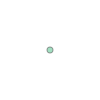

In [144]:
# convert latitude & longitude  of BnB to gis point
#                   (Longitude, Latitude)

geo_point = Point(  -73.9233,43.7717)
geo_point

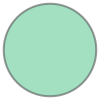

In [148]:
# Increase radius of gis point to incude more area

geo_pointB = geo_point.buffer(.1)
geo_pointB

In [154]:
c = 0
close_gems = []

# loop through rows in dataframe
for i, row in gdf.iterrows():
    print(row['geometry'])
    # Check if 
    if geo_pointB.contains(row['geometry']):
        print('yes')
        # create list of geo points 
        close_gems.append(row['city']) #gemID
        
# Join all gemIDs to a string csv
bnds_gems = ','.join(close_gems)

POINT (-73.930204 43.771663)
yes
POINT (-73.95124 43.779007)
yes
POINT (-73.85191400000001 43.747417)
yes
POINT (-73.85191400000001 43.747417)
yes
POINT (-73.92425799999999 43.771755)
yes
POINT (-73.950862 43.77953400000001)
yes


In [155]:
bnds_gems

', Olmstedville,Olmstedville,Pottersville,Pottersville,Olmstedville,Olmstedville'

In [129]:
o = Point(43.171691, -76.346454)

In [130]:
p = Point(43.16099 ,	-76.33380)

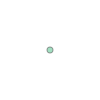

In [131]:
gdf['geometry'][1]

In [133]:
geo_pointB.contains(Point(43.771832, -73.924856))   #(gdf['geometry'][2])

True

In [73]:
x = p.buffer(.1)

In [74]:
x.contains(o)

True

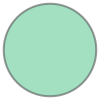

In [75]:
x

In [28]:
x.area

153.690876036751

In [29]:
len(x.exterior.coords)

66

In [30]:
s = x.simplify(0.05, preserve_topology=False)


In [31]:
s.area

152.95081246064467

In [25]:
len(s.exterior.coords)

17